# Star Wars Survey

## Introduction

### Preliminary

This Notebook is the conclusion of the ***Data Cleaning Project Walkthrough*** from [dataquest.io](dataquest.io). It is a guided project whose aim is to use all the techniques and skills learnt during the course. Nevertheless we are dealing with real-word data: in our case with the results of a survey (835 persons answered it)  made by  [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) on the Star Wars saga. You can find the data here survey [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).
> I am sometimes using blockquotes as this one, meaning that for the rest of the project I am quoting some elements given by dataquest. For the sake of simplicity and clarity, I estimated that they did not need any reformulation and were immediately usable and convenient for me and the reader.

### Context

> While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: *does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?*

> The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

> The data has several columns, including:

>- RespondentID - An anonymized ID for the respondent (person taking the survey)
>- Gender - The respondent's gender
>- Age - The respondent's age
>- Household Income - The respondent's income
>- Education - The respondent's education level
>- Location (Census Region) - The respondent's location
>- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
>- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

> There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.



## Reading and Cleaning the Data

As the data set has some characters that aren't in Python's default utf-8 encoding, we must use another type of encoding.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.shape

(1187, 38)

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

On beginning the data set exploration we can firstly state that :
- there are 1187 rows and 38 columns.
- each row accounts for an entire survey that has been adressed to someone, and each column is a question or a sub question of the survey.
- some questions are answered in several columns, for example : " **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film"** will be answered first on this column and then on the Unnamed: 10 	Unnamed: 11 	Unnamed: 12 	Unnamed: 13 	Unnamed: 14 columns.
- there are row with null values for some answers that we are going to investigate.

Starting fith the first column : the 'RespondentID' column, we can see that there are null values, meaning maybe that the user did not want to answer the survey and drop it. We are going to delete the rows where the RespondentID is **Nan**

In [5]:
star_wars=star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

### Cleaning Yes/No columns

The next two columns deal with the answers to the following questions : 
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise? 

Both are "YES/NO" questions so the values here are either : "YES", "NO" or Nan when the person decided not to answer the question. As it is more convenient to work with booleans than strings we are going to map these two columns with a dictionnary created on this purpose.

In [6]:
yes_no = {"Yes": True,"No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=\
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
           
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=\
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)



### Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

Next, we'll need to rename the columns to better reflect what they represent.
- Which of the following Star Wars films have you seen? Please select all that apply. will be named **seen_1**
- Unnamed: 4 wil be named **seen_2**
- Unnamed: 5 will be named **seen_3** 
- etc.




In [7]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [8]:
# renaming the columns
dict_col = {'Which of the following Star Wars films have you seen? Please select all that apply.' :'seen_1',
    'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'}

star_wars = star_wars.rename(columns=dict_col)

In [9]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [10]:
# maping the answers with boolean

import numpy as np
seen_1 = {'Star Wars: Episode I  The Phantom Menace': True, np.nan : False}
seen_2 = {'Star Wars: Episode II  Attack of the Clones': True, np.nan:False}
seen_3 = {'Star Wars: Episode III  Revenge of the Sith':True, np.nan:False}
seen_4 = {'Star Wars: Episode IV  A New Hope':True,np.nan:False}
seen_5 = {'Star Wars: Episode V The Empire Strikes Back':True, np.nan:False}
seen_6 = {'Star Wars: Episode VI Return of the Jedi':True, np.nan:False}

L_dict = [seen_1,seen_2,seen_3,seen_4,seen_5,seen_6]

In [11]:
for col in range(1,7):
    star_wars['seen_'+str(col)] = star_wars['seen_'+str(col)].map(L_dict[col-1])

In [31]:
star_wars[star_wars.columns[3:9]].head(15)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


### Cleaning the ranking columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. 
- How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- etc.

For these six columns we are just going to convert them into floats and rename them so that we can tell what they represent more easily.

In [13]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [14]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [15]:
col_rank = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',\
            'Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5','Unnamed: 14':'ranking_6'}

In [16]:
star_wars = star_wars.rename(columns=col_rank)

In [17]:
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

## Finding the highest-ranked movie 

In [18]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

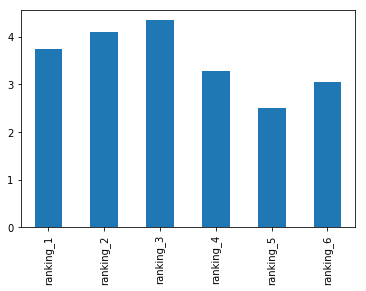

In [19]:
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean().plot.bar()

We computed the average ranking for each of the 6 movies and plotted the results on a bar char so they are more easily readable.
- On average the best movie of the saga is the Star wars V
- the 2 highest is Star Wars VI
- the 3rd is Star Wars IV
- the 4th is Star Wars I
- 5th is Star Wars II
- 6th is Star Wars III

The first thing we can notice is that the original trilogy is more highly ranked than the prequel. One possible hypothesis is that the people who answered the survey are original fans of the Saga, meaning they have watched the IV,V,VI first and then the prequel 16 years after the 6th. A lot of original fans prefer the first trilogy to the second one.

## Finding the Most Viewed Movie

In [20]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

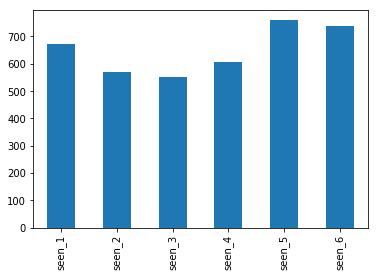

In [21]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

The ranking for the most viewed star wars movies is the following :
- Star Wars V
- Star Wars VI
- Star Wars I
- Star Wars IV
- Star Wars II
- Star Wars III

It is almost the same ranking as the previous one, except that in this one the **3rd and 4th position have been inverted**. According to me it can be explained by the fact that there are two *"first episode"* in this saga. Star Wars IV was originally the first opus of the saga, and Star Wars I is indeed the fouth opus of the saga, it came out 16 years after Star Wars VI. As it is now the first movie chronogically speaking, people who watch the saga for the first time (essentially young people) may start with this one.

## Exploring the Data by binary segments

We are going to split our data set into two groups based on a binary column by creating two subsets of that column.
For instance we are going to use the question : *Do you consider yourself to be a fan of the Star Wars film franchise?*. The values for this column are either TRUE or FALSE. We will create two new dataframes by filtering on these two different values and then we will be able to perform the same analysis as before but for two different groups : the fans and the non-fans.

In [22]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

### Finding the highest-ranked movie

In [23]:
fans[fans.columns[9:15]].mean()

ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
ranking_4    2.932971
ranking_5    2.333333
ranking_6    2.829710
dtype: float64

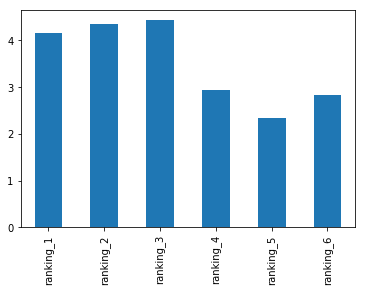

In [24]:
fans[fans.columns[9:15]].mean().plot.bar()

In [25]:
non_fans[non_fans.columns[9:15]].mean()

ranking_1    2.936396
ranking_2    3.591549
ranking_3    4.193662
ranking_4    3.933099
ranking_5    2.862676
ranking_6    3.471831
dtype: float64

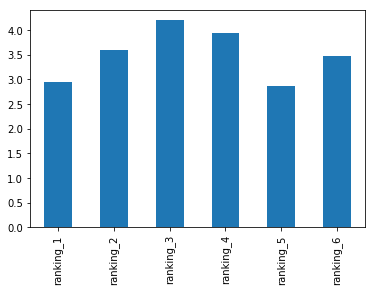

In [26]:
non_fans[non_fans.columns[9:15]].mean().plot.bar()

On the one hand, the ranking for the fans is the same as the ranking made by the whole population of the survey.

On the other hand, the ranking made by the non-fans is different :
- Star Wars V is still considered as the best movie of the saga
- Star Wars I is the 2nd
- Star wars VI is the 3rd
- Star wars II is the 4th
- Star Wars IV is the 5th
- Star Wars III is 6th still considered as the worst movie of the saga.

Both ranking fans and non-fans rank the same movies as the best and the worst respectively, but in between the non-fans ranking is more diversified between the two trilogies, whereas the fans consider the first trilogy as the best.

### Finding the Most Viewed Movie

In [27]:
fans[fans.columns[3:9]].sum().sort_values()

seen_3    450
seen_2    463
seen_4    483
seen_1    500
seen_6    537
seen_5    538
dtype: int64

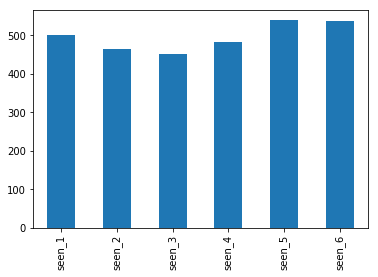

In [28]:
fans[fans.columns[3:9]].sum().plot.bar()

In [29]:
non_fans[non_fans.columns[3:9]].sum().sort_values()

seen_3    100
seen_2    108
seen_4    124
seen_1    173
seen_6    201
seen_5    220
dtype: int64

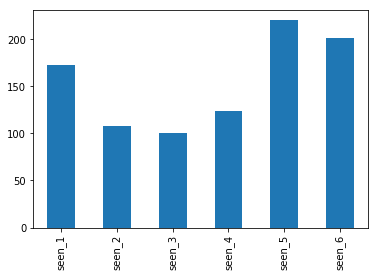

In [30]:
non_fans[non_fans.columns[3:9]].sum().plot.bar()

For both groups (fans/non fans) the ranking is the same (V,VI,I,IV,II,III) and it is the same as the general ranking made before. 